In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetescsv/diabetes.csv
/kaggle/input/wine-quality/winequalityN.csv


In [ ]:
df = pd.read_csv('/kaggle/input/diabetescsv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=20)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
502,6,0,68,41,0,39.0,0.727,41
522,6,114,0,0,0,0.0,0.189,26
681,0,162,76,36,0,49.6,0.364,26
412,1,143,84,23,310,42.4,1.076,22
136,0,100,70,26,50,30.8,0.597,21
...,...,...,...,...,...,...,...,...
218,5,85,74,22,0,29.0,1.224,32
223,7,142,60,33,190,28.8,0.687,61
271,2,108,62,32,56,25.2,0.128,21
474,4,114,64,0,0,28.9,0.126,24


In [ ]:
Y_train

502    1
522    0
681    1
412    0
136    0
      ..
218    1
223    0
271    0
474    0
355    1
Name: Outcome, Length: 576, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import f1_score,classification_report
Y_pred = model.predict(X_test)
f1_score(Y_test,Y_pred,average='weighted')

0.7369186046511627

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192



In [ ]:
list_f1 = []
optimal_f1_score = 0
model_number = 0
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test,Y_pred,average='weighted')
    if f1 > optimal_f1_score:
        optimal_f1_score = f1
        model_number = i
    list_f1.append(f1)


In [ ]:
list_f1

[0.6239705308352849,
 0.6950435626346038,
 0.7022757335257336,
 0.7124930497636918,
 0.7369186046511627,
 0.716124998639367,
 0.7463163955186535,
 0.73449026419626,
 0.7566708283546268,
 0.7650259909031839]

In [ ]:
optimal_f1_score

0.7650259909031839

In [ ]:
model_number

10

In [ ]:
model = [i for i in range(1,11)]
model

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
metric_dataframe = pd.DataFrame(columns=['K_Size','F1_Score','Dataset'])
metric_dataframe

,K_Size,F1_Score,Dataset


In [ ]:
metric_dataframe['K_Size'] = model
metric_dataframe['F1_Score'] = list_f1
metric_dataframe['Dataset'] = 'diabetes'
metric_dataframe

,K_Size,F1_Score,Dataset
0,1,0.623971,diabetes
1,2,0.695044,diabetes
2,3,0.702276,diabetes
3,4,0.712493,diabetes
4,5,0.736919,diabetes
5,6,0.716125,diabetes
6,7,0.746316,diabetes
7,8,0.734490,diabetes
8,9,0.756671,diabetes
9,10,0.765026,diabetes


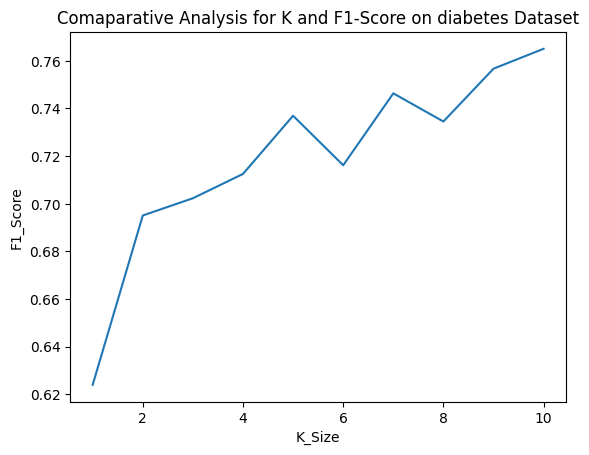

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=metric_dataframe,x='K_Size',y='F1_Score')
plt.title('Comaparative Analysis for K and F1-Score on diabetes Dataset')
plt.show()

In [ ]:
df2  =pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')
df2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df2.iloc[:,0])

LabelEncoder()

In [ ]:
df2['type'] = le.fit_transform(df2['type'])
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df2[df2.isna().any(axis=1)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,1,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,1,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,1,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,1,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,1,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,1,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,1,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,1,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,1,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,1,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [ ]:
df2[df2['quality'].isna()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan)
imputer = imputer.fit(df2)
df2 = imputer.fit_transform(df2)
df2

array([[ 1.   ,  7.   ,  0.27 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 1.   ,  6.3  ,  0.3  , ...,  0.49 ,  9.5  ,  6.   ],
       [ 1.   ,  8.1  ,  0.28 , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 0.   ,  6.3  ,  0.51 , ...,  0.75 , 11.   ,  6.   ],
       [ 0.   ,  5.9  ,  0.645, ...,  0.71 , 10.2  ,  5.   ],
       [ 0.   ,  6.   ,  0.31 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
new_df2 = pd.DataFrame(df2,columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'])

In [ ]:
new_df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,0.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


In [ ]:
X = new_df2.iloc[:,1:]
Y = new_df2.iloc[:,0]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=20)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3148,6.2,0.230,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6.0
6139,9.8,0.370,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8,5.0
1519,8.3,0.200,0.49,1.7,0.040,34.0,169.0,0.99380,3.05,0.37,10.1,5.0
1242,8.1,0.430,0.42,6.6,0.033,36.0,141.0,0.99180,2.98,0.39,13.3,7.0
5184,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5910,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,10.0,5.0
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7.0
1428,8.2,0.180,0.49,1.1,0.033,28.0,81.0,0.99230,3.00,0.68,10.4,7.0
4367,7.1,0.310,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5.0


In [ ]:
Y_train


3148    1
6139    0
1519    1
1242    1
5184    0
       ..
5910    0
3915    1
1428    1
4367    1
2522    1
Name: type, Length: 4872, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import f1_score,classification_report
Y_pred = model.predict(X_test)
f1_score(Y_test,Y_pred,average='weighted')


0.9415022979564964

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       406
         1.0       0.95      0.97      0.96      1219

    accuracy                           0.94      1625
   macro avg       0.93      0.91      0.92      1625
weighted avg       0.94      0.94      0.94      1625



In [ ]:
list_f1 = []
optimal_f1_score = 0
model_number = 0
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test,Y_pred,average='weighted')
    if f1 > optimal_f1_score:
        optimal_f1_score = f1
        model_number = i
    list_f1.append(f1)


In [ ]:
list_f1

[0.9527873199927311,
 0.9345317445931607,
 0.9444772227930456,
 0.9377728737030753,
 0.9415022979564964,
 0.9406754305789071,
 0.9420984415824484,
 0.9424056546836928,
 0.9425368635740263,
 0.9420457803692502]

In [ ]:
optimal_f1_score

0.9527873199927311

In [ ]:
model_number

1

In [ ]:
model = [i for i in range(1,11)]
model

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
metric_dataframe = pd.DataFrame(columns=['K_Size','F1_Score','Dataset'])
metric_dataframe

,K_Size,F1_Score,Dataset


In [ ]:
metric_dataframe['K_Size'] = model
metric_dataframe['F1_Score'] = list_f1
metric_dataframe['Dataset'] = 'wine'
metric_dataframe

,K_Size,F1_Score,Dataset
0,1,0.952787,wine
1,2,0.934532,wine
2,3,0.944477,wine
3,4,0.937773,wine
4,5,0.941502,wine
5,6,0.940675,wine
6,7,0.942098,wine
7,8,0.942406,wine
8,9,0.942537,wine
9,10,0.942046,wine


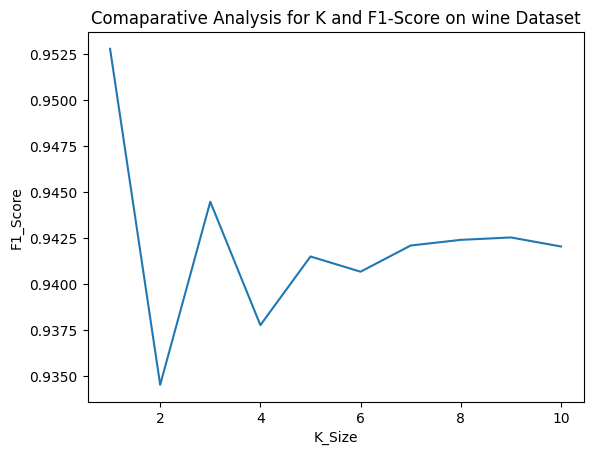

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=metric_dataframe,x='K_Size',y='F1_Score')
plt.title('Comaparative Analysis for K and F1-Score on wine Dataset')
plt.show()